# 1. ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

---
En este proyecto analizaré el comportamiento de 500 clientes de Megaline durante 2018. El objetivo es determinar cuál de los dos planes de prepago disponibles, **Surf** o **Ultimate**, genera mayores ingresos promedio para la empresa.

Para lograr esto:
- Realizaré un análisis exploratorio de los datos provistos sobre llamadas, mensajes, uso de internet y planes contratados.
- Procesaré los datos para convertir tipos y eliminar errores.
- Calcularé el uso mensual por cliente (minutos, SMS, datos) y los ingresos mensuales considerando los cargos por excedentes.
- Describiré estadísticamente el comportamiento de los usuarios según su plan.
- Traeré visualizaciones para entender las distribuciones de uso.
- Probaré hipótesis para determinar si los ingresos promedio difieren significativamente entre planes y regiones.

Al final, presentaré conclusiones claras para apoyar decisiones comerciales sobre el presupuesto de publicidad y la promoción de tarifas.

# 2. Inicialización

In [1]:
# Importación de librerías para el proyecto

# Librería "pandas" para manipulación y análisis de datos
import pandas as pd

# Librería "numpy" para operaciones numéricas y matemáticas
import numpy as np

# Módulo "pyplot" de "matplotlib" para crear visualizaciones
import matplotlib.pyplot as plt

## 2.1. Cargar datos

En esta sección se cargan los archivos de datos proporcionados por la empresa ***Megaline***, correspondientes a los registros de *min de llamadas*, *mensajes*, *uso de internet*, *planes* y *usuarios*.  
Cada archivo se almacena en un `DataFrame` independiente para su análisis posterior. A continuación se describen las columnas presentes en cada uno:

**Tabla: Usuarios (`users`)**
- `user_id`: Identificador único del usuario.
- `first_name`: Nombre del usuario.
- `last_name`: Apellido del usuario.
- `age`: Edad del usuario.
- `reg_date`: Fecha de registro del usuario.
- `churn_date`: Fecha de baja del servicio (si aplica).
- `city`: Ciudad de residencia del usuario.
- `plan`: Nombre de la tarifa contratada.

**Tabla: Planes (`plans`)**
- `plan_name`: Nombre de la tarifa contratada.
- `usd_monthly_fee`: Cuota mensual en dólares estadounidenses.
- `minutes_included`: Minutos incluidos al mes.
- `messages_included`: SMS incluidos al mes.
- `mb_per_month_included`: Datos incluidos al mes (en megabytes).
- `usd_per_minute`: Costo por minuto adicional.
- `usd_per_message`: Costo por SMS adicional.
- `usd_per_gb`: Costo por gigabyte adicional (1 GB = 1024 MB).

**Tabla: Llamadas (`calls`)**
- `id`: Identificador único de la llamada.
- `call_date`: Fecha de la llamada.
- `duration`: Duración de la llamada en minutos.
- `user_id`: Identificador del usuario que realizó la llamada.

**Tabla: Mensajes (`messages`)**
- `id`: Identificador único del mensaje de texto.
- `message_date`: Fecha del mensaje.
- `user_id`: Identificador del usuario que envió el mensaje.

**Tabla: Internet (`internet`)**
- `id`: Identificador único de la sesión web.
- `mb_used`: Volumen de datos utilizados durante la sesión (en megabytes).
- `session_date`: Fecha de la sesión web.
- `user_id`: Identificador del usuario que realizó la sesión.

Esta carga de datos es la base para todo el análisis posterior, asegurando que los datos estén correctamente leídos y estructurados.


In [ ]:
# Carga de DataFrames del proyecto

# Dataframe "Usuarios"
users = pd.read_csv('/content/megaline_users.csv')

# Dataframe "Planes"
plans = pd.read_csv('/content/megaline_plans.csv')

# Dataframe "Llamadas"
calls = pd.read_csv('/content/megaline_calls.csv')

# Dataframe "Mensajes"
messages = pd.read_csv('/content/megaline_messages.csv')

# Dataframe "Internet"
internet = pd.read_csv('/content/megaline_internet.csv')


# 3. Preparar los datos

En esta sección del proyecto se realizará una exploración inicial de cada uno de los conjuntos de datos disponibles: `calls`, `internet`, `messages`, `plans` y `users`.  
El objetivo es:
- Comprender la estructura y el contenido de cada tabla.
- Verificar los tipos de datos de las columnas y detectar si es necesario realizar conversiones (por ejemplo, fechas).
- Identificar la existencia de valores ausentes, nulos o atípicos que requieran corrección o análisis adicional.
- Obtener una primera visión de la calidad de los datos y posibles problemas que deban ser resueltos antes del análisis estadístico.

Para cada tabla:
- Se imprimirá información general con `info()`, `shape` y `head()`.
- Se documentarán las observaciones encontradas y las acciones necesarias.


## 3.1. Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
print('INFORMACION DE TABLA DE PLANES\n')
plans.info()
print()
print(f'Registros totales: {plans.shape[0]}')
print(f'Columnas totales: {plans.shape[1]}')


INFORMACION DE TABLA DE PLANES

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes

Registros totales: 2
Columnas totales: 8


In [4]:
# Imprime una muestra de los datos para las tarifas
print('TABLA DE PLANES')
display(plans.head())


TABLA DE PLANES


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Al explorar la tabla de tarifas (`plans`) se observa lo siguiente:
- La tabla contiene 2 registros, correspondientes a los planes **Surf** y **Ultimate**.
- No existen valores ausentes en ninguna columna.
- Los tipos de datos son apropiados: los campos numéricos están en formato `int64` o `float64` y el nombre del plan en `object`.
- Los datos reflejan correctamente los valores de las tarifas según lo indicado en la descripción del proyecto (cuotas, minutos, SMS y datos incluidos, y los costos por excedentes).

No se requieren modificaciones ni limpieza en esta tabla. Los datos están completos y bien formateados para el análisis.


### 3.1.1. Corregir datos

Vamos a crear la columna `gb_per_month_included`, que indicará los **gigabytes** incluidos en el plan, este valor será calculado de la columna `mb_per_month_included`, que indica los **megabytes** incluidos en el plan, esto ya que trabajaremos con el valor de **gigabytes** más adelante.


In [5]:
# Convertimos MB incluidos en el plan a GB y redondeamos hacia arriba
plans['gb_per_month_included'] = np.ceil(plans['mb_per_month_included'] / 1024).astype(int)

print('SE AGREGO LA COLUMNA gb_per_month_included A LA TABLA plans\n')
plans.info()
print('\nTABLA DE PLANES')
display(plans.head())

SE AGREGO LA COLUMNA gb_per_month_included A LA TABLA plans

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
 8   gb_per_month_included  2 non-null      int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 276.0+ bytes

TABLA DE PLANES


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30


Se incluyó la columna `gb_per_month_included`, queda confirmada la anexión de esta columna a la tabla.

### 3.1.2. Enriquecer los datos

En esta etapa no es necesario agregar factores adicionales a los datos de la tabla `plans`.  
La información provista es suficiente y completa para los cálculos y análisis requeridos en el proyecto.


## 3.2. Usuarios/as

In [6]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
print('INFORMACION DE TABLA DE USUARIOS\n')
users.info()
print()
print(f'Registros totales: {users.shape[0]}')
print(f'Columnas totales: {users.shape[1]}')


INFORMACION DE TABLA DE USUARIOS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB

Registros totales: 500
Columnas totales: 8


In [7]:
# Imprime una muestra de datos para usuarios
print('TABLA DE USUARIOS')
display(users.head())


TABLA DE USUARIOS


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


Al explorar la tabla `users` se observa:
- La tabla contiene 500 registros y 8 columnas.
- Las columnas `reg_date` y `churn_date` están en tipo `object` y deberán convertirse al tipo `datetime` para un análisis adecuado.
- La columna `churn_date` presenta muchos valores ausentes, lo cual es esperable ya que corresponde a usuarios que no han cancelado el servicio.
- No se identifican valores nulos en el resto de las columnas.
- Los valores de `plan` corresponden a los nombres de tarifas válidos: `surf` y `ultimate`.

Por lo tanto, el paso siguiente será convertir las columnas de fechas al tipo `datetime` y mantener los valores nulos en `churn_date` como indicativo de usuarios activos.


### 3.2.1. Corregir los datos

Se identificó que las columnas `reg_date` y `churn_date` están en tipo `object`, lo cual no es adecuado para datos de tipo fecha.  
La corrección necesaria es convertir estas columnas al tipo `datetime` para facilitar el análisis temporal en los pasos posteriores.  
No se requieren otras correcciones, ya que el resto de las columnas no presenta problemas de valores nulos o tipos inadecuados.

In [8]:
# Convertir datos de columnas "reg_date" y "churn_date" a tipo datetime
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])

print('TABLA DE USUARIOS: tipo de datos de columnas "reg_date" y "churn_date" corregidos\n')
users.info()

TABLA DE USUARIOS: tipo de datos de columnas "reg_date" y "churn_date" corregidos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Se realizó la conversión de las columnas `reg_date` y `churn_date` al tipo `datetime`.  
Esto permitirá un análisis temporal correcto en los pasos posteriores.  

### 3.2.2. Enriquecer los datos

En esta etapa no es necesario agregar factores adicionales al DataFrame `users`, ya que las columnas presentes contienen toda la información necesaria para los cálculos y análisis solicitados en el proyecto.

## 3.3. Llamadas

In [9]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
print('INFORMACION DE TABLA DE LLAMADAS\n')
calls.info()
print()
print(f'Registros totales: {calls.shape[0]}')
print(f'Columnas totales: {calls.shape[1]}')


INFORMACION DE TABLA DE LLAMADAS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB

Registros totales: 137735
Columnas totales: 4


In [10]:
# Imprime una muestra de datos para las llamadas
print('TABLA DE LLAMADAS')
display(calls.head())


TABLA DE LLAMADAS


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


Al explorar la tabla `calls` se observa:
- La tabla contiene 137,735 registros y 4 columnas.
- No existen valores nulos en ninguna de las columnas.
- El campo `call_date` está en tipo `object` y debe convertirse a `datetime` para un análisis adecuado.
- La columna `duration` tiene valores positivos en la muestra, lo cual es consistente con datos válidos de duración de llamadas.

El siguiente paso será convertir `call_date` al tipo `datetime` y posteriormente verificar si existen duraciones atípicas (por ejemplo, negativas o cero) durante el preprocesamiento.


### 3.3.1. Corregir los datos

En esta celda realizaremos las siguientes acciones para asegurar la calidad de la tabla `calls`:
- Validaremos si existen registros con duración menor o igual a cero (`duration <= 0`).
- Si se detectan, eliminaremos esos registros, ya que no representan llamadas reales facturables y podrían distorsionar el análisis.
- Convertiremos la columna `call_date` al tipo `datetime` para un análisis temporal adecuado.
- Redondearemos la columna `duration` al alza usando la función `ceil` de numpy, para reflejar correctamente la política de Megaline, donde cada llamada se cobra como un número entero de minutos, redondeando hacia arriba.

Estas acciones dejarán el DataFrame listo para el análisis de uso e ingresos.


In [11]:
# Validar llamadas con duración <= 0
print('VALIDACION DE EXISTENCIA DE LLAMADAS CON DURACION MENOR O IGUAL A 0\n')
invalid_durations = calls[calls['duration'] <= 0]
print(f"Registros inválidos encontrados: {invalid_durations.shape[0]}")

# Eliminar registros con duración <= 0
calls = calls[calls['duration'] > 0].copy()

# Convertir call_date a datetime
calls['call_date'] = pd.to_datetime(calls['call_date'])

# Redondear duration al alza a enteros
calls['duration'] = np.ceil(calls['duration']).astype(int)

# Mostrar info para confirmar los cambios
print('\nCAMBIOS REALIZADOS A TABLA DE LLAMADAS')
print('- ELIMINACION DE REGISTROS DE LLAMADAS CON DURACIONAS MENORES O IGUALES A 0 EN CASO DE EXISTIR')
print('- CAMBIO DE TIPO DE DATO DE COLUMNA call_date A TIPO datetime')
print('- REDONDEO DE LA COLUMNA duration A ENTEROS\n')
calls.info()
print('\nTABLA DE LLAMADAS')
display(calls.head())


VALIDACION DE EXISTENCIA DE LLAMADAS CON DURACION MENOR O IGUAL A 0

Registros inválidos encontrados: 26834

CAMBIOS REALIZADOS A TABLA DE LLAMADAS
- ELIMINACION DE REGISTROS DE LLAMADAS CON DURACIONAS MENORES O IGUALES A 0 EN CASO DE EXISTIR
- CAMBIO DE TIPO DE DATO DE COLUMNA call_date A TIPO datetime
- REDONDEO DE LA COLUMNA duration A ENTEROS

<class 'pandas.core.frame.DataFrame'>
Index: 110901 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         110901 non-null  object        
 1   user_id    110901 non-null  int64         
 2   call_date  110901 non-null  datetime64[ns]
 3   duration   110901 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.2+ MB

TABLA DE LLAMADAS


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9
1,1000_145,1000,2018-12-27,14
2,1000_247,1000,2018-12-27,15
3,1000_309,1000,2018-12-28,6
4,1000_380,1000,2018-12-30,5


Se realizó la validación de la columna `duration` y se identificaron 26,834 registros con duración menor o igual a cero.  
Estos registros fueron eliminados, ya que no representaban llamadas facturables y distorsionarían el análisis.  

Posteriormente:
- La columna `call_date` fue convertida al tipo `datetime`.
- La columna `duration` fue redondeada al alza a enteros, cumpliendo con la política de facturación de Megaline.

El DataFrame `calls` quedó compuesto por 110,901 registros, todos representando llamadas válidas.  
La tabla está lista para los cálculos de uso e ingresos en las siguientes etapas del proyecto.


### 3.3.2. Enriquecer los datos

En esta etapa no se agregaron factores adicionales al DataFrame `calls`.  
Los datos corregidos son suficientes para los cálculos requeridos en el proyecto.

## 3.4. Mensajes

En esta celda se explora el DataFrame `messages` con los siguientes objetivos:
- Obtener información general sobre el número de registros, columnas y tipos de datos.
- Verificar si existen valores nulos o inconsistentes que requieran revisión.
- Mostrar una muestra de los datos para validar que la estructura y el contenido son los esperados.

Esto permitirá identificar posibles problemas antes de proceder a la limpieza o corrección de los datos.

In [12]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
print('INFORMACION DE TABLA DE MENSAJES\n')
messages.info()
print()
print(f'Registros totales: {messages.shape[0]}')
print(f'Columnas totales: {messages.shape[1]}')


INFORMACION DE TABLA DE MENSAJES

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB

Registros totales: 76051
Columnas totales: 3


In [13]:
# Imprime una muestra de datos para los mensajes
print('TABLA DE MENSAJES')
display(messages.head())


TABLA DE MENSAJES


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


Al explorar la tabla `messages` se observa:
- La tabla contiene 76,051 registros y 3 columnas.
- No existen valores nulos en ninguna de las columnas.
- La columna `message_date` está en tipo `object` y deberá convertirse al tipo `datetime` para permitir un análisis temporal adecuado.
- Los datos de la muestra parecen consistentes y no se identifican problemas adicionales.

El siguiente paso será convertir `message_date` a `datetime`.


### 3.4.1. Corregir los datos

En esta celda se aplicará la siguiente corrección al DataFrame `messages`:
- Se convertirá la columna `message_date` al tipo `datetime` para permitir un análisis temporal adecuado y facilitar los cálculos mensuales requeridos en el proyecto.

No se identificaron otros problemas en los datos que requieran corrección.

In [14]:
# Convertir message_date a tipo datetime
messages['message_date'] = pd.to_datetime(messages['message_date'])

# Mostrar info para confirmar el cambio
print('\nCAMBIOS REALIZADOS A TABLA DE MENSAJES')
print('- SE CONVIERTE TIPO DE DATOS DE COLUMNA message_date A TIPO datetime\n')
messages.info()
print('\nTABLA DE MENSAJES')
display(messages.head())


CAMBIOS REALIZADOS A TABLA DE MENSAJES
- SE CONVIERTE TIPO DE DATOS DE COLUMNA message_date A TIPO datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB

TABLA DE MENSAJES


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


La conversión de la columna `message_date` al tipo `datetime` se realizó correctamente.  
El DataFrame `messages` ahora está preparado para los análisis y cálculos temporales requeridos en el proyecto.  
No se identificaron otros problemas que requirieran corrección en esta tabla.


### 3.4.2 Enriquecer los datos

En esta etapa no se agregaron factores adicionales al DataFrame `messages`.  
La información disponible (identificador del mensaje, usuario y fecha) es suficiente para realizar los cálculos y análisis requeridos en el proyecto.

## 3.5. Internet

En esta celda se explora el DataFrame `internet` con los siguientes objetivos:
- Obtener información general sobre el número de registros, columnas y tipos de datos.
- Verificar la existencia de valores nulos o inconsistentes que puedan requerir corrección.
- Mostrar una muestra de los datos para comprobar que los registros son coherentes y válidos.

Esto permitirá identificar problemas potenciales antes de aplicar correcciones o enriquecer los datos.

In [15]:
# Imprime la información general/resumida sobre el DataFrame de internet
print('INFORMACION DE TABLA DE INTERNET\n')
internet.info()
print()
print(f'Registros totales: {internet.shape[0]}')
print(f'Columnas totales: {internet.shape[1]}')


INFORMACION DE TABLA DE INTERNET

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB

Registros totales: 104825
Columnas totales: 4


In [16]:
# Imprime una muestra de datos para el tráfico de internet
print('TABLA DE INTERNET')
display(internet.head())


TABLA DE INTERNET


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


- La tabla contiene **104,825 registros y 4 columnas** sin valores nulos.
- Se observar sesiones con medición en `mb_used` en 0 lo que puede ser indicio de inicios de sesión sin consumo de datos
- La columna `session_date` deberá transformarse a formato `datetime` para análisis temporal.

### 3.5.1. Corregir los datos

En esta celda se validará si existen registros con `mb_used < 0`, ya que estos representarían datos no válidos que distorsionarían el análisis y los cálculos de ingresos.  
Si se detectan, los registros serán eliminados.  
Los registros con `mb_used = 0` serán conservados, dado que representan sesiones iniciadas sin tráfico de datos.  
Además, se convertirá la columna `session_date` al tipo `datetime` para permitir un análisis temporal adecuado.  
Finalmente, se mostrará la estructura del DataFrame tras las acciones aplicadas.

In [17]:
# Validar registros con mb_used < 0
print('VALIDACION DE EXISTENCIA DE SESIONES CON DURACION MENOR A 0\n')
invalid_internet = internet[internet['mb_used'] < 0]
print(f"Registros inválidos encontrados: {invalid_internet.shape[0]}")
if not invalid_internet.empty:
    print(invalid_internet.head())

# Eliminar si existen
internet = internet[internet['mb_used'] >= 0].copy()

# Convertir session_date a tipo datetime para análisis temporal
internet['session_date'] = pd.to_datetime(internet['session_date'])

# Mostrar info para confirmar los cambios
print('\nCAMBIOS REALIZADOS A TABLA DE LLAMADAS')
print('- ELIMINACION DE REGISTROS DE SESIONES CON DURACIONAS MENORES A 0 EN CASO DE EXISTIR')
print('- CAMBIO DE TIPO DE DATO DE COLUMNA session_date A TIPO datetime\n')
internet.info()
print('\nTABLA DE INTERNET\n')
display(internet.head())


VALIDACION DE EXISTENCIA DE SESIONES CON DURACION MENOR A 0

Registros inválidos encontrados: 0

CAMBIOS REALIZADOS A TABLA DE LLAMADAS
- ELIMINACION DE REGISTROS DE SESIONES CON DURACIONAS MENORES A 0 EN CASO DE EXISTIR
- CAMBIO DE TIPO DE DATO DE COLUMNA session_date A TIPO datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB

TABLA DE INTERNET



,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


La validación de la columna `mb_used` confirmó que no existen registros con valores menores a 0.  
Esto indica que todos los registros representan valores técnicamente válidos: ya sea sesiones con consumo positivo de datos o sesiones iniciadas sin tráfico (`mb_used = 0`).  
No fue necesario eliminar registros por valores atípicos en `mb_used`.  
Además, la columna `session_date` fue convertida correctamente al tipo `datetime`, lo que permitirá realizar un análisis temporal adecuado en los siguientes pasos.  
La tabla `internet` está lista para el análisis posterior.


### 3.5.2. Enriquecer los datos

En esta etapa no se agregaron factores adicionales al DataFrame `internet`.  
La información disponible (identificador de sesión, usuario, fecha y uso en MB) es suficiente para los cálculos y análisis requeridos en el proyecto.

# 4. Estudiar las condiciones de las tarifas

En este paso vamos a estudiar las condiciones de las tarifas para entender cómo se facturan los servicios y cómo se calcularán los ingresos en las etapas posteriores.

Esto nos permitirá:
- Saber cuántos minutos, mensajes y MB incluye cada plan.
- Conocer los costos adicionales que se aplican si el usuario supera los límites del plan.
- Establecer correctamente las reglas para el cálculo de ingresos.

Mostraremos la información de la tabla `plans` para confirmar estas condiciones.

In [18]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
display(plans.head())


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30


Al analizar la tabla `plans`, confirmamos las siguientes condiciones:

**Plan Surf**

- Pago mensual: ***\$20*** usd
- Incluye:

  - ***500*** minutos
  - ***50*** mensajes SMS
  - ***15*** GB de datos (15,360 MB)

- Costo adicional:

  - ***\$0.03*** usd por minuto extra  
  - ***\$0.03*** usd por SMS extra
  - ***\$10*** usd por GB adicional

**Plan Ultimate**

- Pago mensual: ***\$70*** usd
- **Incluye:**

  - ***3000*** minutos
  - ***1000*** mensajes SMS
  - ***30*** GB de datos (30,720 MB)

- **Costo adicional:**

  - ***\$0.01*** usd por minuto extra
  - ***\$0.01*** usd por SMS extra
  - ***\$7*** usd por GB adicional

Estas condiciones son las que aplicaremos al calcular los ingresos de los usuarios en las siguientes etapas del proyecto.

## 4.1. Agregar datos por usuario

En esta sección calcularemos el uso mensual de los servicios por cada usuario.
Esto nos permitirá crear un registro único por usuario y mes con sus consumos, que luego usaremos para el cálculo de ingresos y análisis.

Objetivos:
- Calcular el número de llamadas realizadas por usuario y mes.
- Calcular el total de minutos usados por usuario y mes.
- Calcular el número de mensajes enviados por usuario y mes.
- Calcular el volumen total de datos usados por usuario y mes.

In [19]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

# Extraemos el número de mes de la columna 'call_date' y lo almacenamos en una nueva columna 'month'
calls['month'] = calls['call_date'].dt.month
print('SE AGREGO LA COLUMNA month A LA TABLA calls\n')
calls.info()

# Agrupamos por usuario y mes, y contamos el número de llamadas realizadas
calls_per_month = calls.groupby(['user_id', 'month']).agg(
    calls_count=('call_date', 'count')  # Contamos el número de llamadas por usuario y mes
).reset_index()  # Restablecemos el índice para obtener un DataFrame ordenado

print('\nAGRUPACION DE TABLA "calls" POR USUARIO Y MES, CONTEO DE LLAMADAS POR MES')
print('calls_per_month\n')
calls_per_month.info()
print('\nTABLA calls_per_month')
display(calls_per_month.head())

SE AGREGO LA COLUMNA month A LA TABLA calls

<class 'pandas.core.frame.DataFrame'>
Index: 110901 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         110901 non-null  object        
 1   user_id    110901 non-null  int64         
 2   call_date  110901 non-null  datetime64[ns]
 3   duration   110901 non-null  int64         
 4   month      110901 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(2), object(1)
memory usage: 4.7+ MB

AGRUPACION DE TABLA "calls" POR USUARIO Y MES, CONTEO DE LLAMADAS POR MES
calls_per_month

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   user_id      2256 non-null   int64
 1   month        2256 non-null   int32
 2   calls_count  2256 non-null   int64
dtypes: int32(1), int64(2)
memory usa

,user_id,month,calls_count
0,1000,12,16
1,1001,8,22
2,1001,9,38
3,1001,10,47
4,1001,11,49


In [20]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

# Agrupamos por usuario y mes, y sumamos la duración total de las llamadas
minutes_per_month = calls.groupby(['user_id', 'month']).agg(
    total_minutes=('duration', 'sum')  # Sumamos la duración de las llamadas para obtener el total de minutos por usuario y mes
).reset_index()  # Restablecemos el índice para obtener un DataFrame ordenado

print('\nAGRUPACION DE TABLA "calls" POR USUARIO Y MES, CONTEO DE MINUTOS POR MES')
print('minutes_per_month\n')
minutes_per_month.info()
print('\nTABLA minutes_per_month')
display(minutes_per_month.head())


AGRUPACION DE TABLA "calls" POR USUARIO Y MES, CONTEO DE MINUTOS POR MES
minutes_per_month

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   user_id        2256 non-null   int64
 1   month          2256 non-null   int32
 2   total_minutes  2256 non-null   int64
dtypes: int32(1), int64(2)
memory usage: 44.2 KB

TABLA minutes_per_month


,user_id,month,total_minutes
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426


In [21]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

# Extraemos el número de mes de la columna 'message_date' y lo almacenamos en una nueva columna 'month'
messages['month'] = messages['message_date'].dt.month
print('SE AGREGO LA COLUMNA month A LA TABLA messages\n')
messages.info()

# Agrupamos por usuario y mes, y contamos el número de mensajes enviados
messages_per_month = messages.groupby(['user_id', 'month']).agg(
    messages_count=('id', 'count')  # Contamos el número de mensajes por usuario y mes
).reset_index()  # Restablecemos el índice para obtener un DataFrame ordenado

print('\nAGRUPACION DE TABLA message POR USUARIO Y MES, CONTEO DE MENSAJES POR MES')
print('messages_per_month\n')
messages_per_month.info()
print('\nTABLA messages_per_month')
display(messages_per_month.head())

SE AGREGO LA COLUMNA month A LA TABLA messages

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 2.0+ MB

AGRUPACION DE TABLA message POR USUARIO Y MES, CONTEO DE MENSAJES POR MES
messages_per_month

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1806 entries, 0 to 1805
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   user_id         1806 non-null   int64
 1   month           1806 non-null   int32
 2   messages_count  1806 non-null   int64
dtypes: int32(1), int64(2)
memory usage: 35.4 KB


,user_id,month,messages_count
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [22]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

# Extraemos el número de mes de la columna 'session_date' y lo almacenamos en una nueva columna 'month'
internet['month'] = internet['session_date'].dt.month
print('SE AGREGO LA COLUMNA month A LA TABLA internet\n')
internet.info()

# Agrupamos por usuario y mes, y sumamos el volumen total de datos usados (en MB)
internet_per_month = internet.groupby(['user_id', 'month']).agg(
    mb_used=('mb_used', 'sum')  # Sumamos el uso de datos en MB por usuario y mes
).reset_index()  # Restablecemos el índice para obtener un DataFrame ordenado

# Agregamos la columna gb_used con los MB convertidos a GB y redondeados hacia arriba
internet_per_month['gb_used'] = np.ceil(internet_per_month['mb_used'] / 1024).astype(int)

print('\nAGRUPACION DE TABLA internet POR USUARIO Y MES, CONTEO DE VOLUMEN TOTAL DE DATOS POR MES')
print('internet_per_month\n')
internet_per_month.info()
print('\nTABLA internet_per_month')
display(internet_per_month.head())

SE AGREGO LA COLUMNA month A LA TABLA internet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(1)
memory usage: 3.6+ MB

AGRUPACION DE TABLA internet POR USUARIO Y MES, CONTEO DE VOLUMEN TOTAL DE DATOS POR MES
internet_per_month

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  2277 non-null   int64  
 1   month    2277 non-null   int32  
 2   mb_used  2277 non-nul

,user_id,month,mb_used,gb_used
0,1000,12,1901.47,2
1,1001,8,6919.15,7
2,1001,9,13314.82,14
3,1001,10,22330.49,22
4,1001,11,18504.30,19


Se lograron calcular correctamente las métricas mensuales por usuario para llamadas, minutos usados, mensajes enviados y tráfico de Internet en MB.  
Los resultados muestran que la información fue agrupada de forma consistente por `user_id` y `month`, permitiendo obtener el volumen de uso de cada servicio por periodo.  
Estos datos servirán como base para fusionar la información, añadir las condiciones de las tarifas y proceder con el cálculo de ingresos mensuales por usuario.

---

En esta etapa fusionaremos los datos agregados de llamadas, minutos, mensajes e internet por usuario y mes para consolidarlos en un solo DataFrame.
Posteriormente, se añadirá la información de las tarifas de cada usuario para poder realizar los cálculos de ingresos y análisis posteriores.
Esto permitirá tener un registro único por usuario y mes que contemple todo el uso de los servicios y las condiciones tarifarias asociadas.


In [23]:
# Fusiona los datos de llamadas, minutos, mensajes e internet con base en user_id y month

# Unimos llamadas y minutos
user_month_data = pd.merge(calls_per_month, minutes_per_month, on=['user_id', 'month'], how='outer')

# Unimos con mensajes
user_month_data = pd.merge(user_month_data, messages_per_month, on=['user_id', 'month'], how='outer')

# Unimos con internet
user_month_data = pd.merge(user_month_data, internet_per_month, on=['user_id', 'month'], how='outer')

print('\nUNION DE TABLAS DE CONSUMO POR MES calls/minutes/messages/internet_per_month')
print('user_month_data\n')
user_month_data.info()
print('\nTABLA user_month_data')
display(user_month_data.head())



UNION DE TABLAS DE CONSUMO POR MES calls/minutes/messages/internet_per_month
user_month_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         2293 non-null   int64  
 1   month           2293 non-null   int32  
 2   calls_count     2256 non-null   float64
 3   total_minutes   2256 non-null   float64
 4   messages_count  1806 non-null   float64
 5   mb_used         2277 non-null   float64
 6   gb_used         2277 non-null   float64
dtypes: float64(5), int32(1), int64(1)
memory usage: 116.6 KB

TABLA user_month_data


,user_id,month,calls_count,total_minutes,messages_count,mb_used,gb_used
0,1000,12,16.0,124.0,11.0,1901.47,2.0
1,1001,8,22.0,182.0,30.0,6919.15,7.0
2,1001,9,38.0,315.0,44.0,13314.82,14.0
3,1001,10,47.0,393.0,53.0,22330.49,22.0
4,1001,11,49.0,426.0,36.0,18504.30,19.0


In [24]:
# Añade la información de la tarifa

# Primero unimos con users para añadir el plan
user_month_data = pd.merge(user_month_data, users[['user_id', 'plan', 'city']], on='user_id', how='left')

# Ahora unimos con plans para añadir los detalles de la tarifa correspondiente
user_month_data = pd.merge(user_month_data, plans, left_on='plan', right_on='plan_name', how='left')

print('UNION DE TABLAS users Y plans A TABLA user_month\n')
user_month_data.info()
print('\nTABLA user_month_data')
display(user_month_data.head())


UNION DE TABLAS users Y plans A TABLA user_month

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2293 non-null   int64  
 1   month                  2293 non-null   int32  
 2   calls_count            2256 non-null   float64
 3   total_minutes          2256 non-null   float64
 4   messages_count         1806 non-null   float64
 5   mb_used                2277 non-null   float64
 6   gb_used                2277 non-null   float64
 7   plan                   2293 non-null   object 
 8   city                   2293 non-null   object 
 9   messages_included      2293 non-null   int64  
 10  mb_per_month_included  2293 non-null   int64  
 11  minutes_included       2293 non-null   int64  
 12  usd_monthly_pay        2293 non-null   int64  
 13  usd_per_gb             2293 non-null   int64  
 14  usd_pe

,user_id,month,calls_count,total_minutes,messages_count,mb_used,gb_used,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,1000,12,16.0,124.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01,ultimate,30
1,1001,8,22.0,182.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf,15
2,1001,9,38.0,315.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf,15
3,1001,10,47.0,393.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf,15
4,1001,11,49.0,426.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf,15


En esta fase se logró enriquecer el DataFrame combinado al integrar la información completa de los planes de tarifas. Primero se añadió el nombre del plan de cada usuario mediante un merge con la tabla de usuarios. Luego, se incorporaron los detalles específicos de cada plan (como límites incluidos y costos por excedente) a través de un merge con la tabla de planes.

El resultado es un DataFrame completo y consolidado que contiene, por cada usuario y mes, el consumo de llamadas, minutos, mensajes e internet junto con los datos de la tarifa contratada. Este DataFrame será clave para calcular los ingresos mensuales y analizar el comportamiento de los usuarios respecto a sus planes.

---

En este paso vamos a calcular el ingreso mensual por usuario. Para ello:

- Restaremos de cada consumo (minutos, mensajes y datos) los límites incluidos en su plan.
- Calcularemos el excedente de cada tipo de servicio.
- Multiplicaremos cada excedente por el costo adicional correspondiente.
- Sumaremos estos cargos al costo mensual fijo de su plan.
- Obtendremos así el ingreso total que representa cada usuario en cada mes.

Este cálculo permitirá evaluar qué tan rentables son los distintos planes en función del uso real de los usuarios.

In [25]:
# Calcula el ingreso mensual para cada usuario

# Calculamos el excedente del usuario por mes
# Excedente de minutos utilizados
user_month_data['minutes_over'] = (user_month_data['total_minutes'] - user_month_data['minutes_included']).clip(lower=0)
user_month_data['cost_minutes_over'] = user_month_data['minutes_over'] * user_month_data['usd_per_minute']
# Excedente de mensajes utilizados
user_month_data['messages_over'] = (user_month_data['messages_count'] - user_month_data['messages_included']).clip(lower=0)
user_month_data['cost_messages_over'] = user_month_data['messages_over'] * user_month_data['usd_per_message']
# Excedente de datos utilizados
user_month_data['gb_over'] = (user_month_data['gb_used'] - user_month_data['gb_per_month_included']).clip(lower=0)
user_month_data['cost_gb_over'] = user_month_data['gb_over'] * user_month_data['usd_per_gb']

# Calculamos el ingreso por excedentes
user_month_data['income'] = (
    user_month_data['usd_monthly_pay'] +
    user_month_data['cost_minutes_over'] +
    user_month_data['cost_messages_over'] +
    user_month_data['cost_gb_over']
)

# Mostramos las primeras filas con los ingresos calculados
print('INFORMACION DE TABLA user_month_data\n')
user_month_data.info()
print('\nINGRESOS CALCULADOS, DATOS DE TABLA user_month_data')
display(user_month_data[['user_id', 'month', 'usd_monthly_pay', 'cost_minutes_over', 'cost_messages_over', 'cost_gb_over', 'income']].head(10))


INFORMACION DE TABLA user_month_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2293 non-null   int64  
 1   month                  2293 non-null   int32  
 2   calls_count            2256 non-null   float64
 3   total_minutes          2256 non-null   float64
 4   messages_count         1806 non-null   float64
 5   mb_used                2277 non-null   float64
 6   gb_used                2277 non-null   float64
 7   plan                   2293 non-null   object 
 8   city                   2293 non-null   object 
 9   messages_included      2293 non-null   int64  
 10  mb_per_month_included  2293 non-null   int64  
 11  minutes_included       2293 non-null   int64  
 12  usd_monthly_pay        2293 non-null   int64  
 13  usd_per_gb             2293 non-null   int64  
 14  usd_per_message   

,user_id,month,usd_monthly_pay,cost_minutes_over,cost_messages_over,cost_gb_over,income
0,1000,12,70,0.00,0.00,0.0,70.00
1,1001,8,20,0.00,0.00,0.0,20.00
2,1001,9,20,0.00,0.00,0.0,20.00
3,1001,10,20,0.00,0.09,70.0,90.09
4,1001,11,20,0.00,0.00,40.0,60.00
5,1001,12,20,0.00,0.00,40.0,60.00
6,1002,10,20,0.00,0.00,0.0,20.00
7,1002,11,20,0.00,0.00,40.0,60.00
8,1002,12,20,0.00,0.00,0.0,20.00
9,1003,12,20,18.12,0.00,120.0,158.12


En este bloque hemos calculado correctamente el ingreso mensual de cada usuario considerando:

- El plan mensual base al que están suscritos.
- Los cargos adicionales por minutos, mensajes de texto y datos que exceden los límites incluidos en el plan.
- Para los datos excedentes, aplicamos el redondeo al alza de los gigabytes utilizados (por ejemplo, si el usuario consume 1025 MB se le cobran 2 GB), lo que asegura que los cargos se ajusten a la política establecida por la compañía.
- Se utilizaron funciones como `clip(lower=0)` para evitar valores negativos.

Esto nos deja un DataFrame listo con los ingresos calculados de forma realista y coherente para cada usuario por mes.

## 4.2. Estudia el comportamiento de usuario

En esta etapa del análisis se busca calcular estadísticas descriptivas y realizar visualizaciones útiles para entender el comportamiento de los usuarios con relación a sus consumos.  
El objetivo es comparar el uso de los distintos servicios (llamadas, mensajes, datos) en función de los planes contratados (Surf o Ultimate) para determinar cuál plan resulta más rentable para la compañía.

En particular:
- Se analizarán las duraciones de llamadas, los minutos mensuales usados y su distribución según el plan y mes.
- Se generarán gráficos (barras, histogramas, diagramas de caja) para facilitar la interpretación.
- Se estudiará si hay diferencias claras en los patrones de uso entre los planes.

Las conclusiones obtenidas permitirán fundamentar recomendaciones sobre los planes y sus rentabilidades.

### 4.2.1 Llamadas

En esta sección se analizará el comportamiento de los usuarios con relación a sus llamadas telefónicas.  
Se pretende:
- Comparar la **duración promedio de llamadas** por plan y por mes, y visualizarla mediante un gráfico de barras.
- Comparar la **distribución de los minutos mensuales usados** por los usuarios de cada plan, mediante un histograma.

Estos análisis permitirán identificar patrones de uso que podrían estar asociados a las diferencias entre los planes contratados (Surf y Ultimate) y a las necesidades reales de los usuarios en distintos momentos del año.

,plan,month,total_minutes
0,surf,1,203.00
1,surf,2,297.00
2,surf,3,330.00
3,surf,4,351.54
4,surf,5,410.24



GRAFICA DE BARRAS



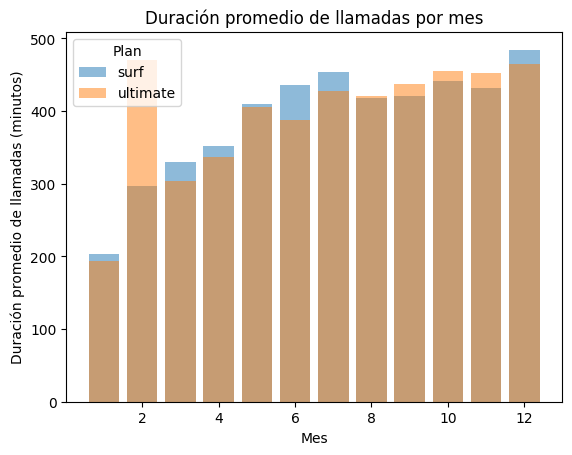

In [26]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

# Agrupamos los datos por plan y mes y calculamos la duración promedio de las llamadas
avg_call_duration = user_month_data.groupby(['plan', 'month'])['total_minutes'].mean().reset_index()

# Mostramos los primeros registros para verificar la estructura
display(avg_call_duration.head())
print()

# Creamos un gráfico para cada plan
plans = avg_call_duration['plan'].unique()
for plan in plans:
    data = avg_call_duration[avg_call_duration['plan'] == plan]
    plt.bar(data['month'], data['total_minutes'], label=plan, alpha=0.5)

plt.title('Duración promedio de llamadas por mes')
plt.xlabel('Mes')
plt.ylabel('Duración promedio de llamadas (minutos)')
plt.legend(title='Plan')

print('GRAFICA DE BARRAS\n')
plt.show()


**DURACIÓN PROMEDIO DE LLAMADAS POR MES**

- Los usuarios de **Plan Ultimate** hacen llamadas más largas cada mes, aprovechando sus **3000 minutos incluidos**.
- Los del **Plan Surf** comienzan con poco uso, pero desde el mes 5 **se acercan o superan los 500 minutos**, lo que puede generar **costos por excedente**.
- Esta diferencia sugiere que algunos usuarios del Plan Surf podrían **beneficiarse cambiando al Plan Ultimate**.
- En general, hay una **tendencia creciente** en la duración promedio de llamadas a lo largo del año.

> Recomendación: monitorear usuarios del Plan Surf con alto consumo para evitar cargos sorpresivos y mejorar su experiencia.


HISTOGRAMA



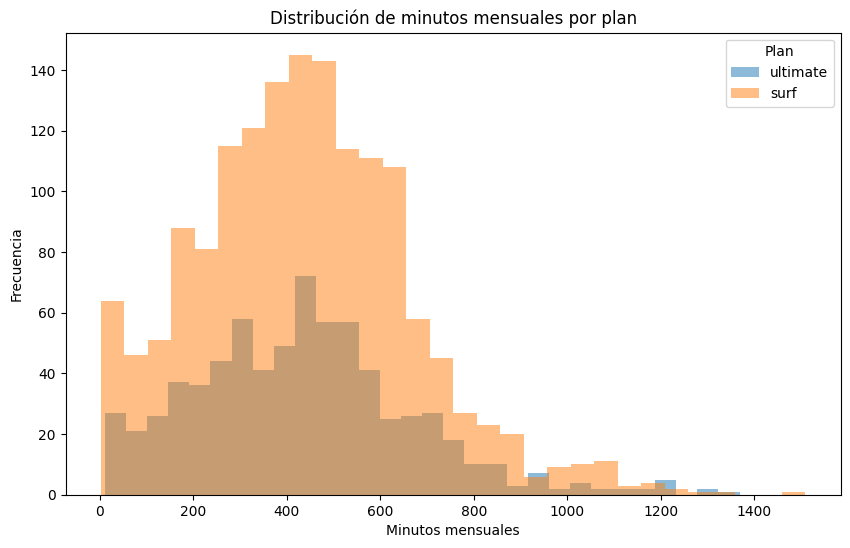

In [27]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

# Creamos una figura
plt.figure(figsize=(10, 6))

# Dibujamos un histograma para cada plan
# Extraemos una lista con los planes existentes en la tabla user_month_data
plans = user_month_data['plan'].unique()
for plan in plans:
    data = user_month_data[user_month_data['plan'] == plan]['total_minutes']
    plt.hist(data, bins=30, alpha=0.5, label=plan)

plt.title('Distribución de minutos mensuales por plan')
plt.xlabel('Minutos mensuales')
plt.ylabel('Frecuencia')
plt.legend(title='Plan')

print('HISTOGRAMA\n')
plt.show()


Este histograma muestra cómo se distribuye el consumo mensual de minutos entre los usuarios de los planes **Surf** y **Ultimate**.

**Observaciones clave**

- **Plan Surf**:
  - La mayoría de usuarios consumen entre **300 y 500 minutos**, muy cerca del límite de **500 minutos incluidos**.
  - Muchos usuarios lo superan, generando **costos por excedente** a \$0.03 por minuto.
  - Son candidatos ideales para **migrar al Plan Ultimate**.

- **Plan Ultimate**:
  - Aunque incluye **3000 minutos**, la mayoría de usuarios usan solo entre **300 y 600 minutos**.
  - Esto indica **bajo aprovechamiento** del plan y mayor margen de ganancia para la empresa.

**Conclusión**

> El Plan Surf genera ingresos adicionales por excedente, pero también puede provocar insatisfacción si los usuarios no están informados.  
> El Plan Ultimate está sobrado para muchos usuarios, lo que sugiere oportunidades para ofrecer **planes intermedios** o ajustar estrategias de marketing.


---

En esta sección vamos a calcular las estadísticas descriptivas de la duración mensual de las llamadas de los usuarios.  
El objetivo es analizar la media (promedio) y la varianza de estas duraciones para identificar si existen diferencias notables entre los distintos planes de tarifas.  
Adicionalmente, generaremos un diagrama de caja (*boxplot*) para visualizar la distribución de la duración mensual de llamadas y detectar posibles valores atípicos o diferencias entre los planes.  

Esto nos permitirá comprender mejor el comportamiento de los usuarios en relación con el uso de minutos y evaluar si el plan contratado influye en dicho comportamiento.

In [28]:
# Calcula la media y la varianza de la duración mensual de llamadas.
# Agrupamos los datos por plan y calculamos media y varianza de los minutos totales
call_stats = user_month_data.groupby('plan')['total_minutes'].agg(['mean', 'var']).reset_index()

# Mostramos las estadísticas resultantes
display(call_stats)


,plan,mean,var
0,surf,436.802461,52481.561083
1,ultimate,435.286517,56387.085163


DIAGRAMA DE CAJA



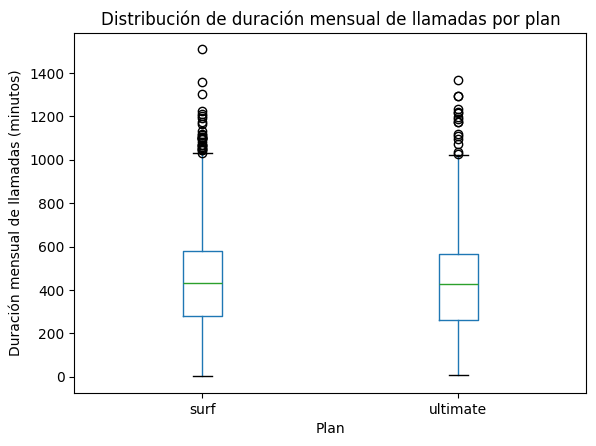

In [29]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

# Creamos el boxplot de total_minutes por plan
user_month_data.boxplot(column='total_minutes', by='plan', grid=False)

# Añadimos título y etiquetas
plt.title('Distribución de duración mensual de llamadas por plan')
plt.suptitle('')  # Eliminamos el título automático adicional que genera pandas
plt.xlabel('Plan')
plt.ylabel('Duración mensual de llamadas (minutos)')

# Mostramos el gráfico
print('DIAGRAMA DE CAJA\n')
plt.show()


Este diagrama de caja compara la distribución mensual de minutos usados en llamadas por los usuarios de los planes **Surf** y **Ultimate**.

**Observaciones clave**

- **Mediana similar** (~400 min) en ambos planes: indica que la mayoría de los usuarios usan una cantidad similar de minutos, sin importar el plan.
- **Distribución central (IQR)** también parecida: el 50% de los usuarios en ambos planes consume entre ~250 y ~550 minutos al mes.
- **Muchos outliers** en ambos planes, especialmente por encima de los **1000 minutos**.
  - En **Surf**, esto implica **cobros por excedente**.
  - En **Ultimate**, esos mismos consumos están **cubiertos por el plan** (hasta 3000 min).

**Conclusión**

> Aunque la mayoría de los usuarios tiene consumos similares, los del Plan Surf están expuestos a cargos adicionales por minutos excedidos.  
> La empresa puede aprovechar esta información para identificar a usuarios con riesgo de excedente y **ofrecerles un cambio de plan** más adecuado a su perfil de consumo.


### 4.2.2. Mensajes

En esta sección vamos a estudiar cómo varía el número de mensajes enviados por los usuarios de los diferentes planes (*surf* y *ultimate*) a lo largo de los meses. Esto nos permitirá identificar patrones de uso y posibles diferencias en el comportamiento según el plan contratado.

Realizaremos:

1. **Gráfico de barras** con el promedio de mensajes enviados por plan y mes.
2. **Histograma** con la distribución de mensajes mensuales por plan.
3. **Diagrama de caja (boxplot)** para visualizar la distribución mensual de los mensajes por plan.

Cada gráfico nos brindará una perspectiva complementaria: el gráfico de barras nos mostrará las tendencias generales, el histograma nos permitirá ver la frecuencia de diferentes rangos de mensajes enviados, y el diagrama de caja nos ayudará a identificar la dispersión y los posibles valores atípicos (outliers).

,plan,month,messages_count
0,surf,1,21.000000
1,surf,2,21.600000
2,surf,3,21.937500
3,surf,4,24.166667
4,surf,5,33.017857



GRAFICA DE BARRAS



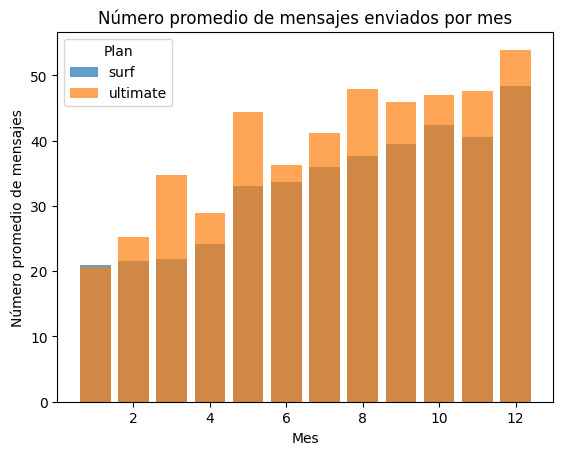

In [30]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

# Agrupamos los datos por plan y mes, y calculamos el promedio de mensajes
avg_messages = user_month_data.groupby(['plan', 'month'])['messages_count'].mean().reset_index()

# Mostramos los primeros registros para validar
display(avg_messages.head())

# Creamos un gráfico por cada plan
plans = avg_messages['plan'].unique()
for plan in plans:
    data = avg_messages[avg_messages['plan'] == plan]
    plt.bar(data['month'], data['messages_count'], label=plan, alpha=0.7)

# Añadimos títulos y etiquetas
plt.title('Número promedio de mensajes enviados por mes')
plt.xlabel('Mes')
plt.ylabel('Número promedio de mensajes')
plt.legend(title='Plan')

print('\nGRAFICA DE BARRAS\n')
plt.show()

Este gráfico de barras compara el promedio mensual de mensajes SMS enviados por usuarios de los planes **Surf** y **Ultimate**, mes a mes.

**Observaciones clave**

- Ambos planes muestran una **tendencia creciente** en el envío de mensajes a lo largo del año.
- **Plan Ultimate**:
  - Consistentemente tiene **promedios más altos** que el Plan Surf.
  - A partir del mes 6, supera con frecuencia los **40-50 mensajes por mes**, dentro de los **1000 SMS incluidos** → **sin riesgo de excedente**.
- **Plan Surf**:
  - Promedios menores, pero en ascenso.
  - Desde el mes 9 en adelante, el promedio se **acerca o supera los 50 mensajes mensuales**, que es exactamente el límite del plan.
  - Esto implica un **potencial incremento de cargos extra** a \$0.03 por SMS adicional.

**Conclusión**

> A medida que el año avanza, los usuarios de ambos planes envían más SMS, pero los del Plan Surf están en **riesgo creciente de exceder su límite mensual**.  
> Se recomienda implementar alertas o sugerencias de cambio de plan a usuarios Surf con uso sostenido cercano al límite de 50 mensajes.


HISTOGRAMA



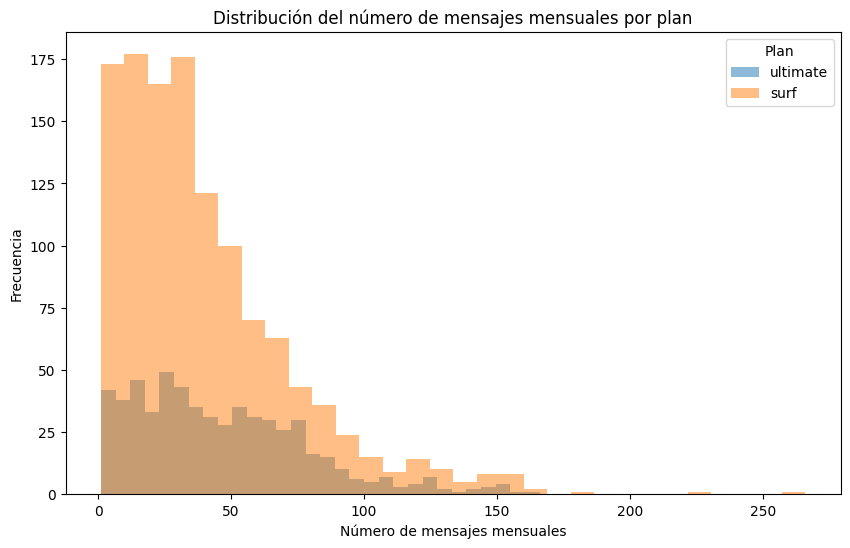

In [31]:
# Histograma del número de mensajes enviados por mes diferenciando por plan

# Creamos una figura
plt.figure(figsize=(10, 6))

# Dibujamos un histograma para cada plan
plans = user_month_data['plan'].unique()
for plan in plans:
    data = user_month_data[user_month_data['plan'] == plan]['messages_count']
    plt.hist(data, bins=30, alpha=0.5, label=plan)

# Añadimos títulos y etiquetas
plt.title('Distribución del número de mensajes mensuales por plan')
plt.xlabel('Número de mensajes mensuales')
plt.ylabel('Frecuencia')
plt.legend(title='Plan')

print('HISTOGRAMA\n')
plt.show()

Este histograma muestra cómo se distribuye el envío mensual de mensajes SMS entre los usuarios de los planes **Surf** y **Ultimate**.

**Observaciones clave**

- **Plan Surf**:
  - Alta concentración de usuarios entre **0 y 50 mensajes mensuales**, lo que coincide con el límite del plan.
  - Hay una **cola larga hacia la derecha**, indicando varios usuarios que **exceden el límite** de 50 mensajes y probablemente generan **costos extra**.

- **Plan Ultimate**:
  - Distribución más **amplia y uniforme**, con muchos usuarios enviando **entre 30 y 100 mensajes**, sin riesgo de excedente (hasta 1000 incluidos).
  - Pocos usuarios superan los 150 mensajes, lo que indica que **el plan cubre adecuadamente** las necesidades típicas.

**Conclusión**

> La mayoría de los usuarios del Plan Surf están dentro o cerca del límite mensual de 50 SMS, pero hay una fracción considerable que lo supera, lo cual representa ingresos adicionales por excedentes.  
> Los usuarios del Plan Ultimate tienen mayor libertad de uso sin exceder el límite. Este análisis refuerza la idea de ofrecer **migración al plan superior** para usuarios Surf con consumo consistentemente alto.


DIAGRAMA DE CAJA



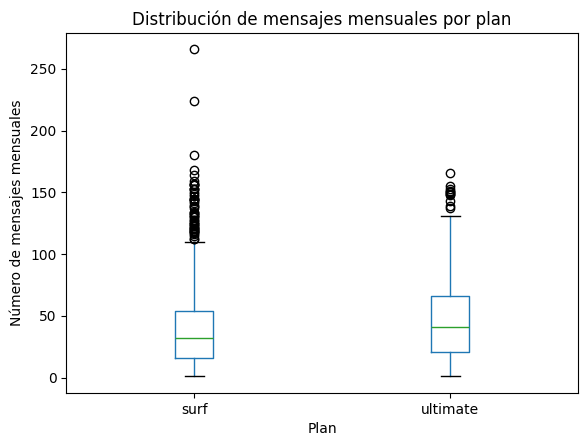

In [32]:
# Diagrama de caja para visualizar la distribución de mensajes mensuales por plan

import matplotlib.pyplot as plt

# Generamos el boxplot
user_month_data.boxplot(column='messages_count', by='plan', grid=False)

# Añadimos títulos y etiquetas
plt.title('Distribución de mensajes mensuales por plan')
plt.suptitle('')  # Eliminamos el título adicional automático de pandas
plt.xlabel('Plan')
plt.ylabel('Número de mensajes mensuales')

# Mostramos el gráfico
print('DIAGRAMA DE CAJA\n')
plt.show()


Este diagrama de caja compara la distribución mensual de SMS enviados por los usuarios de los planes **Surf** y **Ultimate**.

**Observaciones clave**

- **Mediana**:
  - Similar en ambos planes, entre **30 y 40 mensajes** al mes.
  - Esto indica que la mitad de los usuarios de ambos planes envía menos de esa cantidad.

- **Dispersión**:
  - El rango intercuartílico (IQR) del Plan Ultimate es ligeramente más alto, lo que sugiere **mayor variabilidad** entre sus usuarios.

- **Outliers**:
  - En ambos planes hay **valores atípicos** por encima de los **100 SMS mensuales**, algunos superando los 250.
  - En el **Plan Surf**, esto implica **excedente sobre los 50 SMS incluidos** → usuarios están generando **cargos adicionales** a \$0.03 por mensaje extra.
  - En **Ultimate**, aunque hay más mensajes enviados, **no hay impacto financiero** (límite: 1000 SMS).

**Conclusión**

> Aunque la mayoría de los usuarios de ambos planes envían pocos mensajes al mes, hay una fracción significativa de usuarios del Plan Surf que superan el límite de 50 SMS y podrían estar incurriendo en costos adicionales.  
> Se recomienda identificar a estos usuarios y considerar **migración al Plan Ultimate** o **alertas preventivas** para evitar insatisfacción por cargos extra.


### 4.2.3. Internet

En esta sección realizaremos un análisis descriptivo del tráfico de Internet de los usuarios según su plan (*surf* y *ultimate*). El objetivo es comprender cómo los usuarios tienden a consumir datos y si el comportamiento varía significativamente en función del plan contratado.

Generaremos tres tipos de visualizaciones:
- Un **gráfico de barras** con el consumo promedio mensual de datos por plan y mes.
- Un **histograma** para observar la distribución del consumo mensual por plan.
- Un **diagrama de caja** (boxplot) para visualizar la dispersión y los posibles valores atípicos en el uso mensual de datos.

Esto nos permitirá identificar patrones de uso, rangos típicos de consumo y detectar comportamientos atípicos o extremos en el uso de Internet por parte de los usuarios de cada plan.

,plan,month,gb_used
0,surf,1,5.000000
1,surf,2,12.222222
2,surf,3,13.565217
3,surf,4,12.469388
4,surf,5,14.302632


GRAFICA DE BARRAS



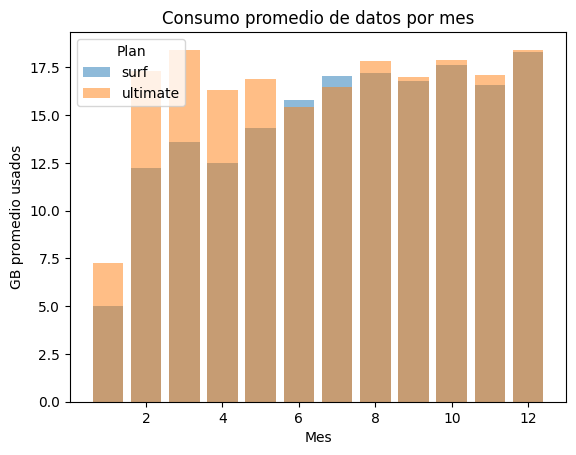

In [33]:
# Compara el consumo promedio mensual de datos por plan y por mes

# Agrupamos los datos por plan y mes y calculamos el promedio de MB usados
avg_data_usage = user_month_data.groupby(['plan', 'month'])['gb_used'].mean().reset_index()

# Mostramos los primeros registros para verificar
display(avg_data_usage.head())

# Visualizamos los resultados con un gráfico de barras

# Creamos el gráfico para cada plan
plans = avg_data_usage['plan'].unique()
for plan in plans:
    data = avg_data_usage[avg_data_usage['plan'] == plan]
    plt.bar(data['month'], data['gb_used'], alpha=0.5, label=plan)

# Añadimos títulos y etiquetas
plt.title('Consumo promedio de datos por mes')
plt.xlabel('Mes')
plt.ylabel('GB promedio usados')
plt.legend(title='Plan')

print('GRAFICA DE BARRAS\n')
plt.show()


Este gráfico compara el consumo promedio mensual de datos móviles (en GB) entre los usuarios de los planes **Surf** y **Ultimate** durante el año.

**Observaciones clave**

- **Tendencia creciente**:
  - Ambos planes muestran un aumento gradual en el consumo de datos conforme avanza el año.
  - Esto sugiere una mayor dependencia del internet móvil o uso de servicios digitales.

- **Plan Ultimate**:
  - Presenta un consumo **consistente y ligeramente superior** al de Surf en casi todos los meses.
  - Esto es esperable, ya que incluye **30 GB**, lo que permite mayor uso sin restricciones.

- **Plan Surf**:
  - Se mantiene cercano a los **15-17 GB mensuales** desde el mes 6 en adelante.
  - Esto es **cercano al límite de 15 GB (15,360 MB)**, por lo que hay un riesgo real de **excedente**, lo que implica cargos de **\$10 por GB adicional**.

**Conclusión**

> El consumo de datos está en aumento generalizado. Los usuarios del Plan Surf se acercan peligrosamente al límite mensual de 15 GB, mientras que los del Plan Ultimate tienen margen de uso sin generar costos extra.  
> Se recomienda identificar a los usuarios Surf con uso sostenido por encima de los 15 GB y proponerles **migración al Plan Ultimate** para evitar cargos adicionales y mejorar su experiencia.


HISTOGRAMA



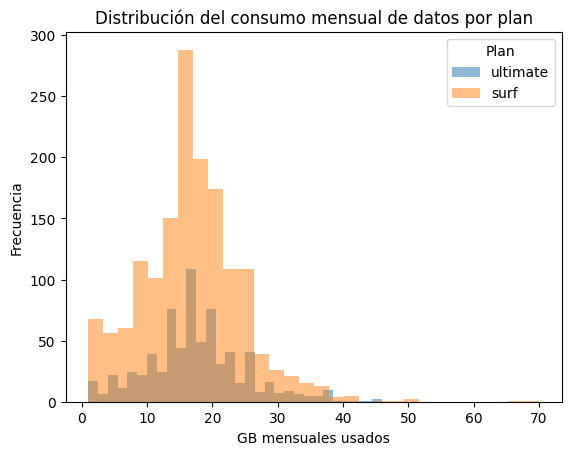

In [34]:
# Crea un histograma de la distribución del consumo mensual de datos por plan

# Creamos el histograma
plans = user_month_data['plan'].unique()
for plan in plans:
    data = user_month_data[user_month_data['plan'] == plan]
    plt.hist(data['gb_used'], bins=30, alpha=0.5, label=plan)

# Añadimos títulos y etiquetas
plt.title('Distribución del consumo mensual de datos por plan')
plt.xlabel('GB mensuales usados')
plt.ylabel('Frecuencia')
plt.legend(title='Plan')

print('HISTOGRAMA\n')
plt.show()


Este histograma muestra la distribución del consumo mensual de datos (en MB) por parte de los usuarios de los planes **Surf** y **Ultimate**.

**Observaciones clave**

- **Plan Surf**:
  - La mayoría de los usuarios se concentran entre los **10,000 y 20,000 MB** (≈10–20 GB).
  - Recordando que el plan incluye **15,360 MB (15 GB)**, muchos usuarios están cerca o por encima del límite.
  - Hay una cantidad significativa de usuarios que **exceden los 20,000 MB**, lo que genera **costos adicionales** a \$10 por GB extra.

- **Plan Ultimate**:
  - Distribución más extendida y plana.
  - Usuarios consumen desde 5,000 MB hasta más de 40,000 MB (≈40 GB), sin preocuparse por excedentes (plan cubre hasta 30 GB).
  - Los casos por encima de 30,720 MB implican **excedente**, pero a una tarifa menor (\$7/GB).

- **Comparación**:
  - La distribución del Plan Surf es más **picuda y concentrada**, indicando comportamiento similar entre usuarios.
  - La del Plan Ultimate es más **dispersa**, lo que sugiere **diversidad de perfiles de consumo**.

**Conclusión**

> El Plan Surf agrupa a usuarios con consumo elevado cercano al límite de 15 GB, muchos de los cuales incurren en cargos extra.  
> En contraste, el Plan Ultimate alberga una gama más amplia de comportamientos, permitiendo alto consumo sin penalización significativa.  
> Esto confirma que varios usuarios del Plan Surf podrían beneficiarse migrando al Plan Ultimate para evitar sobrecostos recurrentes.


DIAGRAMA DE CAJA



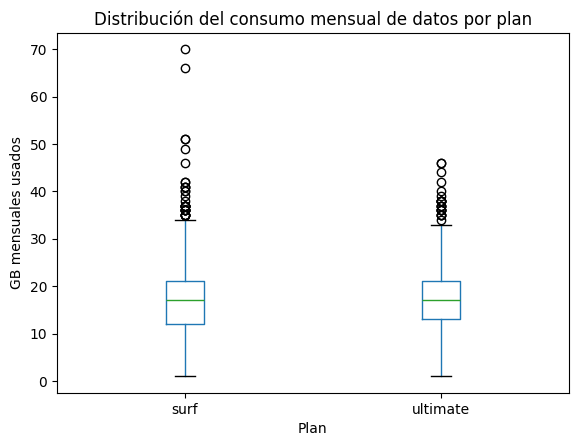

In [35]:
# Crea un diagrama de caja para visualizar la distribución del consumo mensual de datos por plan

# Creamos el boxplot
user_month_data.boxplot(column='gb_used', by='plan', grid=False)

# Añadimos títulos y etiquetas
plt.title('Distribución del consumo mensual de datos por plan')
plt.suptitle('')  # Eliminamos el título adicional automático que genera pandas
plt.xlabel('Plan')
plt.ylabel('GB mensuales usados')

# Mostramos el gráfico
print('DIAGRAMA DE CAJA\n')
plt.show()


Este diagrama de caja compara la distribución mensual del uso de datos móviles (en GB) entre los usuarios de los planes **Surf** y **Ultimate**.

**Observaciones clave**

- **Mediana similar** en ambos planes (~17–18 GB), lo que indica que los patrones de consumo centrales son comparables.

- **Distribución (IQR)**:
  - El 50% central de los usuarios en ambos planes consume entre **~12 y ~22 GB** al mes.
  - Esto es particularmente significativo para el **Plan Surf**, que solo ofrece **15 GB incluidos**, por lo que muchos usuarios están dentro del rango de **riesgo de excedente**.

- **Outliers**:
  - Numerosos usuarios en ambos planes exceden los **30 GB** mensuales.
    - En **Surf**, esto implica **cobros altos** por GB adicional (\$10/GB).
    - En **Ultimate**, los excedentes también existen, pero el impacto económico es menor (\$7/GB).

- **Usuarios extremos**:
  - Algunos usuarios del Plan Surf consumen **más de 50–60 GB**, lo cual representa un uso intensivo y un **coste elevado** si no se detecta a tiempo.

**Conclusión**

> Aunque la mediana de consumo es parecida en ambos planes, los usuarios del Plan Surf tienen mayor riesgo de excedente dado su límite de 15 GB.  
> Este análisis refuerza la necesidad de monitorear a los usuarios con consumo alto y ofrecerles migración al Plan Ultimate para reducir costos adicionales y mejorar la experiencia de servicio.


### 4.2.4. Ingreso

En esta sección analizaremos estadísticamente los ingresos mensuales generados por los usuarios, diferenciados según el plan contratado (**Surf** o **Ultimate**).  

El objetivo es comprender cómo varían los ingresos entre los planes y detectar patrones relevantes que puedan impactar la estrategia comercial de la empresa.

Realizaremos tres tipos de visualizaciones para el análisis:  

- **Gráfico de barras:** muestra el ingreso promedio mensual por plan y mes.  
- **Histograma:** permite observar la distribución de los ingresos mensuales por plan.  
- **Boxplot (diagrama de caja):** facilita identificar la dispersión y los valores atípicos en los ingresos mensuales de cada plan.

Este análisis permitirá:  
- Detectar diferencias significativas en los ingresos generados por los distintos planes.  
- Identificar usuarios o grupos con ingresos atípicos.  
- Generar información clave para decisiones estratégicas sobre precios y ajustes de planes.

,plan,month,income
0,surf,1,20.000000
1,surf,2,23.914000
2,surf,3,38.540625
3,surf,4,40.591429
4,surf,5,50.857170


GRAFICA DE BARRAS



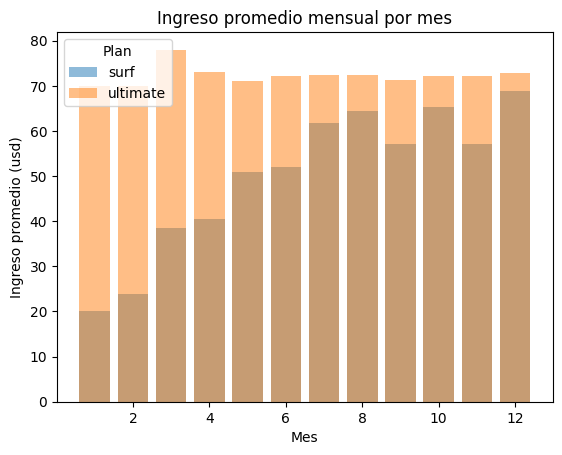

In [36]:
# Agrupamos los datos por plan y mes y calculamos el ingreso promedio
avg_income = user_month_data.groupby(['plan', 'month'])['income'].mean().reset_index()

# Mostramos los primeros registros para validar que el cálculo es correcto
display(avg_income.head())

# Visualizamos el ingreso promedio mensual por plan y mes
plans = avg_income['plan'].unique()
for plan in plans:
    data = avg_income[avg_income['plan'] == plan]
    plt.bar(data['month'], data['income'], alpha=0.5, label=plan)

plt.title('Ingreso promedio mensual por mes')
plt.xlabel('Mes')
plt.ylabel('Ingreso promedio (usd)')
plt.legend(title='Plan')

print('GRAFICA DE BARRAS\n')
plt.show()


Este gráfico muestra el ingreso mensual promedio generado por usuario para los planes **Surf** y **Ultimate** a lo largo del año.

**Observaciones clave**

- **Plan Ultimate**:
  - Ingreso constante en todos los meses, alrededor de **\$70**, que coincide con el **precio base fijo del plan**.
  - Esto indica que **la mayoría de los usuarios no generan cargos adicionales**, lo cual refleja estabilidad pero poco margen de ingreso extra.

- **Plan Surf**:
  - Ingresos comienzan bajos (~\$20, igual al precio base), pero **aumentan progresivamente** desde el mes 3.
  - A partir del mes 6, los ingresos promedios por usuario superan los **\$50 e incluso alcanzan \$68**, muy cerca del ingreso del Plan Ultimate.
  - Este incremento se debe claramente a los **cargos por excedente** (minutos, SMS o datos).

- **Tendencia general**:
  - A lo largo del año, el ingreso del Plan Surf **crece sostenidamente**, mientras que el del Plan Ultimate **permanece plano**.
  - El Plan Surf resulta **más rentable por usuario cuando hay sobreuso**, aunque esto puede generar **insatisfacción si el usuario no es consciente de los cargos extra**.

**Conclusión**

> Aunque el Plan Ultimate ofrece ingresos estables, el Plan Surf puede superar su rentabilidad en usuarios de alto consumo, gracias a los cargos por excedente.  
> Sin embargo, esta rentabilidad **depende del sobreuso** y podría comprometer la satisfacción del cliente.  
> La estrategia ideal sería monitorear usuarios Surf con ingresos mensuales cercanos a \$70 y ofrecerles una migración anticipada al Plan Ultimate, mejorando su experiencia sin sacrificar la rentabilidad.


HISTOGRAMA



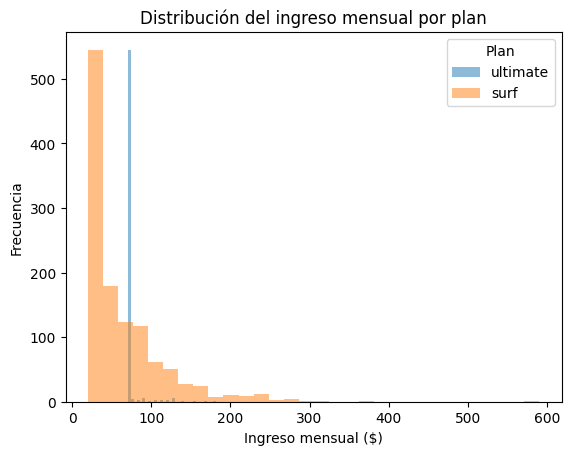

In [37]:
# Visualizamos la distribución de ingresos con un histograma para cada plan
for plan in user_month_data['plan'].unique():
    data = user_month_data[user_month_data['plan'] == plan]
    plt.hist(data['income'], bins=30, alpha=0.5, label=plan)

plt.title('Distribución del ingreso mensual por plan')
plt.xlabel('Ingreso mensual ($)')
plt.ylabel('Frecuencia')
plt.legend(title='Plan')

print('HISTOGRAMA\n')
plt.show()


Este histograma muestra cómo se distribuyen los ingresos mensuales generados por usuario, separados por plan **Surf** y **Ultimate**.

**Observaciones clave**

- **Plan Ultimate**:
  - Aparece como una **línea vertical en \$70**, indicando que **todos los usuarios pagan un monto fijo**.
  - hay muy poca variación de ingresos por excedentes: **estabilidad con muy pocos ingresos adicionales**.

- **Plan Surf**:
  - Tiene una distribución **asimétrica a la derecha (cola larga)**.
  - La mayoría de usuarios generan ingresos entre **\$20 y \$70**, pero existe una fracción que genera **montos muy elevados**, algunos incluso **superan los \$400 o \$500**.
  - Esto se debe a los **cargos por minutos, mensajes y datos excedentes**.

- **Riesgo e impacto**:
  - Aunque la cola larga sugiere **alta rentabilidad potencial**, también implica **riesgo de insatisfacción**, reclamos o cancelaciones si el usuario no está informado o preparado para el sobrecargo.

**Conclusión**

> El Plan Surf ofrece ingresos más variados y, en algunos casos, mucho más altos que el Plan Ultimate, gracias a los cargos por uso adicional.  
> Sin embargo, este modelo depende del comportamiento del usuario y puede no ser sostenible si no se acompaña de **alertas, transparencia y recomendaciones personalizadas**.  
> El Plan Ultimate garantiza estabilidad; el Plan Surf ofrece oportunidad, pero con riesgo.


DIAGRAMA DE CAJA



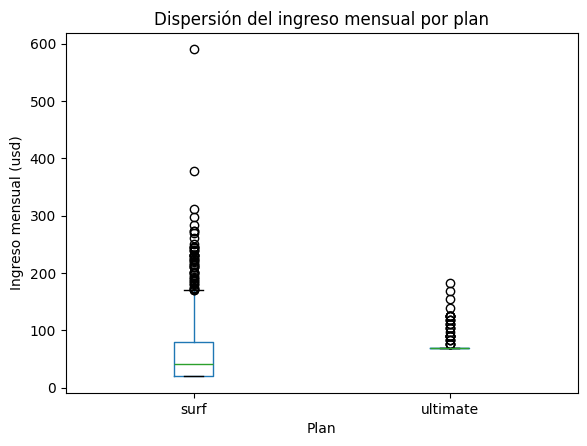

In [38]:
user_month_data.boxplot(column='income', by='plan', grid=False)

plt.title('Dispersión del ingreso mensual por plan')
plt.suptitle('') # Suprimimos el título adicional generado por pandas
plt.xlabel('Plan')
plt.ylabel('Ingreso mensual (usd)')

print('DIAGRAMA DE CAJA\n')
plt.show()

Este diagrama de caja muestra la distribución del ingreso mensual generado por usuario para los planes **Surf** y **Ultimate**.

**Observaciones clave**

- **Plan Surf**:
  - Alta dispersión en los ingresos: el rango intercuartílico va de aproximadamente **\$25 a \$65**, con la mediana cercana a **\$45–\$50**.
  - Numerosos **outliers** alcanzan y superan los **\$200, \$300 y hasta \$600**, debido a **cargos por excedente** (minutos, SMS, datos).
  - Esto refleja una estructura de ingresos **variable pero con alto potencial**.

- **Plan Ultimate**:
  - Distribución extremadamente concentrada: ingresos mensuales casi constantes alrededor de **\$70**, correspondiente al **precio base** del plan.
  - Solo unos pocos **outliers por encima de \$70**, probablemente por cargos adicionales muy esporádicos.
  - Refleja un modelo de ingreso **estable pero sin sorpresas**.

**Conclusión**

> El Plan Surf genera ingresos altamente variables, con una minoría de usuarios que contribuyen con montos significativamente altos debido al uso excesivo.  
> El Plan Ultimate mantiene ingresos constantes, lo cual es ideal para previsión financiera, pero sin posibilidad de generar ingresos adicionales importantes.  
> Esto sugiere que el Plan Surf puede ser rentable, pero debe gestionarse con cuidado para evitar descontento por sobrecargos.


# 5. Prueba las hipótesis estadísticas

En este bloque realizaremos una prueba de hipótesis estadística para determinar si existe una diferencia significativa en los **ingresos promedio mensuales** entre los usuarios de los planes de llamada **Ultimate** y **Surf**.

**Objetivo**:

Comparar los ingresos mensuales generados por usuarios según el tipo de plan contratado, con el fin de identificar si el plan influye en el ingreso promedio.

**Variables involucradas**

- `plan`: tipo de plan de cada usuario (`'ultimate'` o `'surf'`).
- `income`: ingreso total mensual del usuario.

**Formulación de hipótesis**

- **Hipótesis nula (H₀):** Los ingresos promedio mensuales de los usuarios de los planes Ultimate y Surf son iguales.

  H₀: μ₁ = μ₂

- **Hipótesis alternativa (H₁):** Los ingresos promedio mensuales de los usuarios de los planes Ultimate y Surf son diferentes.

  H₁: μ₁ ≠ μ₂

**Prueba estadística**

Utilizaremos una **prueba t de Student para muestras independientes** con el supuesto de **varianzas desiguales** (Welch’s t-test), adecuada para comparar dos medias de grupos independientes con posible dispersión distinta.

**Nivel de significancia**

- Se establece un valor alfa (**α**) de **0.05**.
- Si el valor p obtenido es menor que 0.05, rechazamos la hipótesis nula.

Esta prueba nos permitirá concluir si hay diferencias estadísticamente significativas entre los ingresos promedio de los dos tipos de planes.


In [39]:
# Prueba las hipótesis
from scipy import stats as st

# Filtrar los ingresos mensuales por tipo de plan
income_surf = user_month_data[user_month_data['plan'] == 'surf']['income']
income_ultimate = user_month_data[user_month_data['plan'] == 'ultimate']['income']

# Eliminar valores nulos
income_surf = income_surf.dropna()
income_ultimate = income_ultimate.dropna()

# Realizar prueba t de Student para muestras independientes (varianzas desiguales)
alpha = 0.05
result = st.ttest_ind(income_surf, income_ultimate, equal_var=False)

# Resultados
print(f'Valor p: {result.pvalue}')

# Evaluación de hipótesis
if result.pvalue < alpha:
    print("Se rechaza la hipótesis nula: hay una diferencia significativa entre los ingresos promedio.")
else:
    print("No se puede rechazar la hipótesis nula: no hay evidencia suficiente de una diferencia significativa.")



Valor p: 5.697848749357263e-13
Se rechaza la hipótesis nula: hay una diferencia significativa entre los ingresos promedio.


**Conclusión**

El valor p obtenido fue **5.697848749357263e-13**, lo que equivale a aproximadamente **0.0000000000005697**, muy por debajo del nivel de significancia convencional de **α = 0.05**.

Por tanto, **se rechaza la hipótesis nula**, lo que indica que **existe una diferencia estadísticamente significativa entre los ingresos promedio** de los usuarios de los planes de llamada *Ultimate* y *Surf*.

Esto sugiere que el plan contratado tiene un efecto significativo sobre el ingreso mensual generado por usuario.


---

**Prueba de hipótesis: diferencia por región**

Queremos comprobar si existe una diferencia significativa en el ingreso promedio mensual entre los usuarios del área **NY-NJ** y los usuarios de **otras regiones**.

Para ello, planteamos las siguientes hipótesis:

- **Hipótesis nula (H₀):** El ingreso promedio mensual de los usuarios del área NY-NJ es igual al de los usuarios de otras regiones.

- **Hipótesis alternativa (H₁):** El ingreso promedio mensual de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.

Usaremos una **prueba t de dos muestras independientes** (`scipy.stats.ttest_ind`), asumiendo varianzas desiguales (`equal_var=False`) y un valor de significancia **α = 0.05**.

Nuestro objetivo es determinar si la ubicación geográfica tiene un impacto significativo en el ingreso mensual promedio.


In [40]:
# Prueba las hipótesis

# Filtrar los datos por ciudad
ny_nj_income = user_month_data[user_month_data['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['income']
other_income = user_month_data[user_month_data['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['income']

# Eliminar valores faltantes si los hubiera
ny_nj_income = ny_nj_income.dropna()
other_income = other_income.dropna()

# Prueba de hipótesis: comparación de medias con varianzas desiguales (Welch's t-test)
alpha = 0.05
result = st.ttest_ind(ny_nj_income, other_income, equal_var=False)

# Imprimir resultado
print(f"Valor p: {result.pvalue:.15f}")
if result.pvalue < alpha:
    print("Se rechaza la hipótesis nula: hay una diferencia significativa entre los ingresos promedio.")
else:
    print("No se puede rechazar la hipótesis nula: no hay evidencia suficiente de una diferencia.")



Valor p: 0.004360752396178
Se rechaza la hipótesis nula: hay una diferencia significativa entre los ingresos promedio.


**Conclusión**

La prueba de hipótesis aplicada para comparar los ingresos promedio de los usuarios del área **New York-Newark-Jersey City, NY-NJ-PA MSA** frente a los usuarios de otras regiones arrojó un **valor p de 0.00436**.

Dado que este valor es **menor que el nivel de significancia α = 0.05**, se **rechaza la hipótesis nula**.

**Conclusión final:** Hay una **diferencia estadísticamente significativa** entre los ingresos promedio de los usuarios del área NY-NJ y los de otras regiones.


# 6. Conclusión general

Este proyecto tuvo como objetivo analizar el comportamiento mensual de los usuarios móviles y evaluar la rentabilidad de los planes tarifarios **Surf** y **Ultimate**, con base en su uso de llamadas, mensajes y datos móviles. A lo largo del análisis, se tomaron decisiones metodológicas importantes que permitieron dar forma al procesamiento, limpieza y análisis estadístico de los datos.

### Supuestos y decisiones metodológicas clave:

1. **Conversión y normalización de datos**:
   - Se decidió convertir los megabytes a gigabytes (`gb_used`) y redondear hacia arriba usando `np.ceil()` para reflejar el modelo de cobro real.
   - Se creó una columna `gb_per_month_included` en el DataFrame `plans` para tener los datos comparables en la misma unidad (GB).

2. **Tratamiento del exceso de uso**:
   - Se aplicó `.clip(lower=0)` para asegurarse de que solo se contabilizara el **uso excedente**, evitando valores negativos que no representan cargos reales.

3. **Visualización como herramienta de exploración**:
   - Se usaron histogramas, diagramas de caja y gráficos de líneas para detectar tendencias, distribuciones y posibles outliers.
   - Estas visualizaciones guiaron las decisiones sobre qué pruebas estadísticas aplicar y qué segmentos requerían atención (por ejemplo, usuarios de Surf con consumo elevado).

4. **Comparación de planes**:
   - Se trató a los planes como **grupos independientes**, lo que justificó el uso de una **prueba t de Student para muestras independientes (Welch's test)** al comparar ingresos promedio.

5. **Regionalización del análisis**:
   - Para la segunda hipótesis, se agruparon usuarios según su pertenencia a la región **New York-Newark-Jersey City** frente al resto del país, lo que permitió analizar la influencia de la ubicación geográfica sobre el ingreso.

---

### Conclusiones clave:

1. **Diferencias significativas por plan**:
   - Los usuarios del Plan Surf, aunque tienen un precio base bajo, suelen exceder sus límites de servicio (minutos, SMS, datos), generando así **ingresos variables y potencialmente más altos** que los usuarios del Plan Ultimate.

2. **Plan Ultimate como modelo estable**:
   - El ingreso mensual por usuario se mantiene constante en $70, sin excedentes significativos. Es un modelo **estable y predecible**, pero sin espacio para ingresos adicionales.

3. **Tendencias crecientes de uso**:
   - A lo largo del año, el uso promedio mensual de todos los servicios (minutos, SMS, GB) crece, lo que puede indicar una **mayor dependencia digital** o una adaptación progresiva del usuario al servicio.

4. **Diferencias regionales en ingresos**:
   - Los usuarios del área NY-NJ generan **ingresos promedio significativamente diferentes** frente al resto del país, lo cual sugiere que **la ubicación geográfica influye en el comportamiento de consumo**.

---

### Recomendaciones:

- Implementar **migración automática sugerida** para usuarios del Plan Surf con consumo recurrente por encima de los límites incluidos.
- Diseñar un **plan intermedio** para usuarios que no se ajustan bien ni a Surf ni a Ultimate.
- Utilizar los hallazgos regionales para **personalizar estrategias comerciales y de precios**, en función de las características de consumo por zona geográfica.

**Cierre:**  
El proyecto demuestra que el análisis sistemático de datos de uso y facturación permite obtener **insights accionables** para mejorar tanto la experiencia del cliente como la eficiencia financiera de la empresa.
